#### Import Packages

In [35]:
import pandas as pd
import pickle
import json
import numpy as np

from tqdm import tqdm
from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity

from utils.system import *
from class_data.data import Data
from class_generate.generate import Generate

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [20]:
# Load articles
wsj_art = Data(folder_path=get_format_data() / 'preprocess', file_pattern='wsj_preprocess_*')
wsj_art = wsj_art.concat_files()

#### Get Count 

In [41]:
# User Input
input = ["esg"]

In [42]:
# Get Count
def generate_count(article, input_list):
    data = article.copy(deep=True)
    for i, input in tqdm(enumerate(input_list), desc="Processing input..."):
        # Get Count
        data[f'count_{i}'] = data['preprocess'].str.count(input)
    return data[data.columns[1:]]

In [43]:
# Get Scores
scores = generate_count(article=wsj_art, input_list=input)
# Average Scores across Columns
score = scores.mean(axis=1).to_frame('score')

Processing input...: 1it [00:03,  3.12s/it]


<Axes: xlabel='date'>

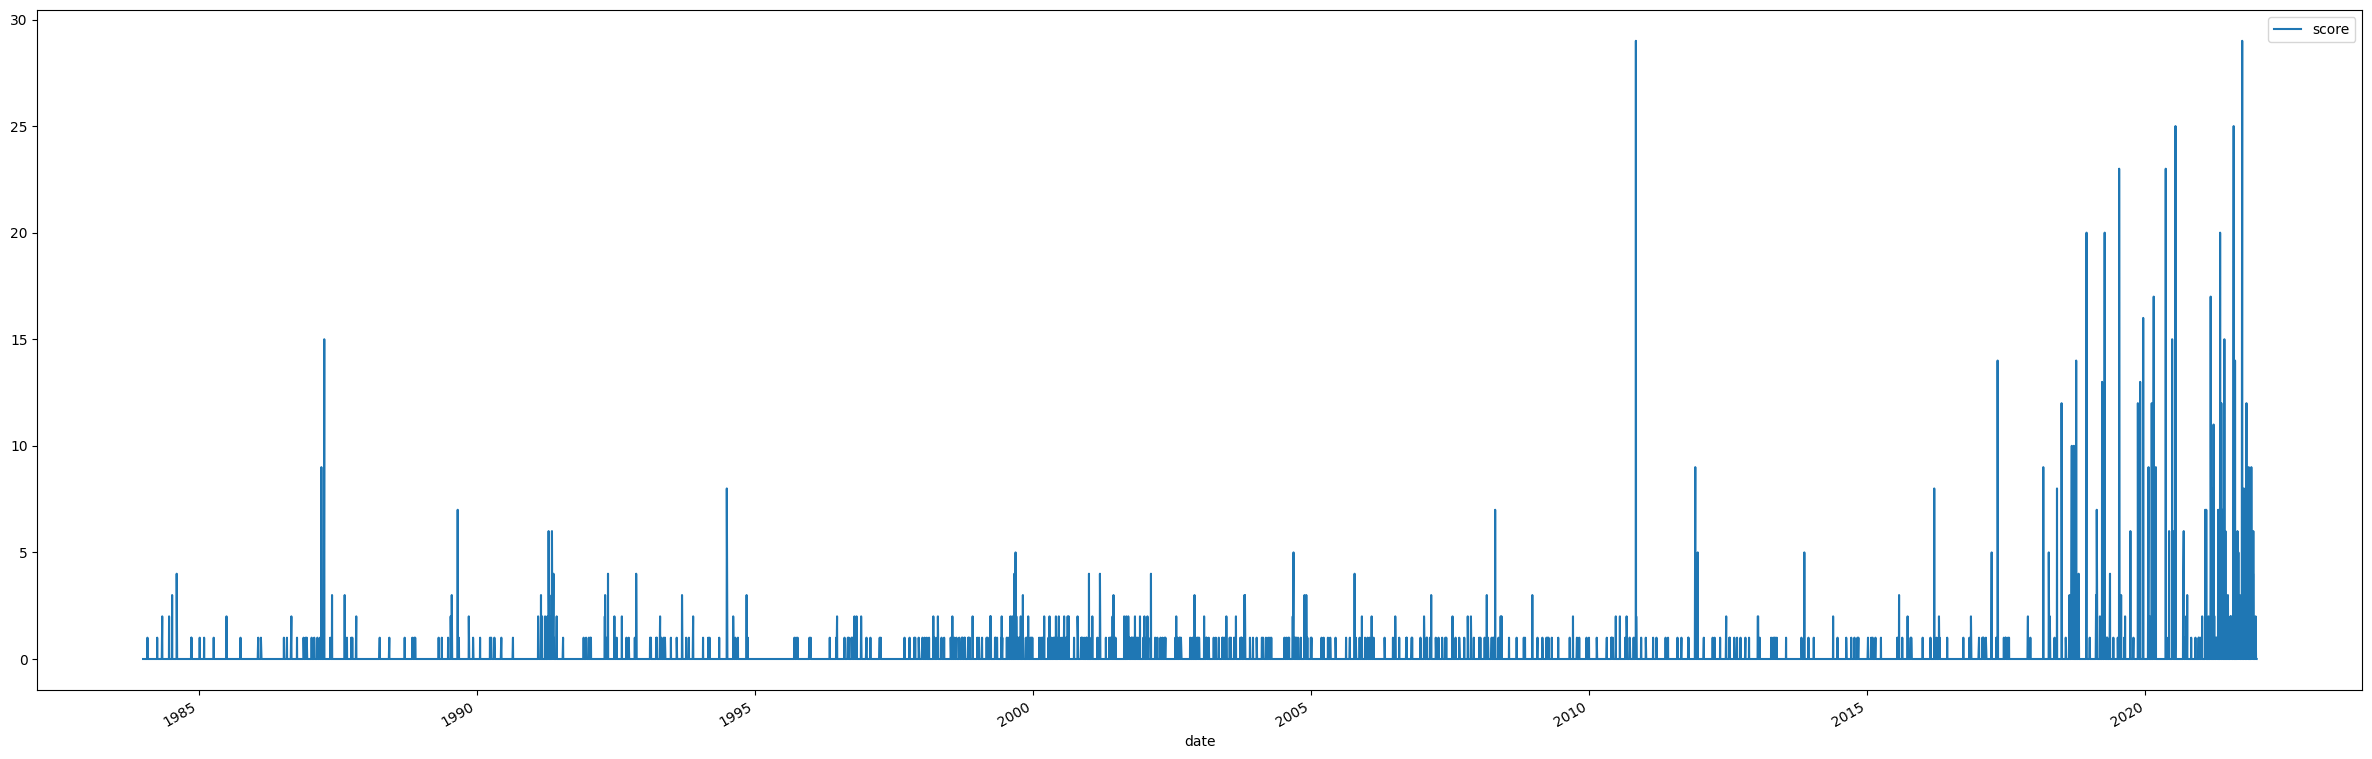

In [44]:
# Generate Index
index = score.groupby('date').apply(lambda x: x['score'].sum()).to_frame("score")
index.plot(figsize=(30, 10))

<Axes: xlabel='date'>

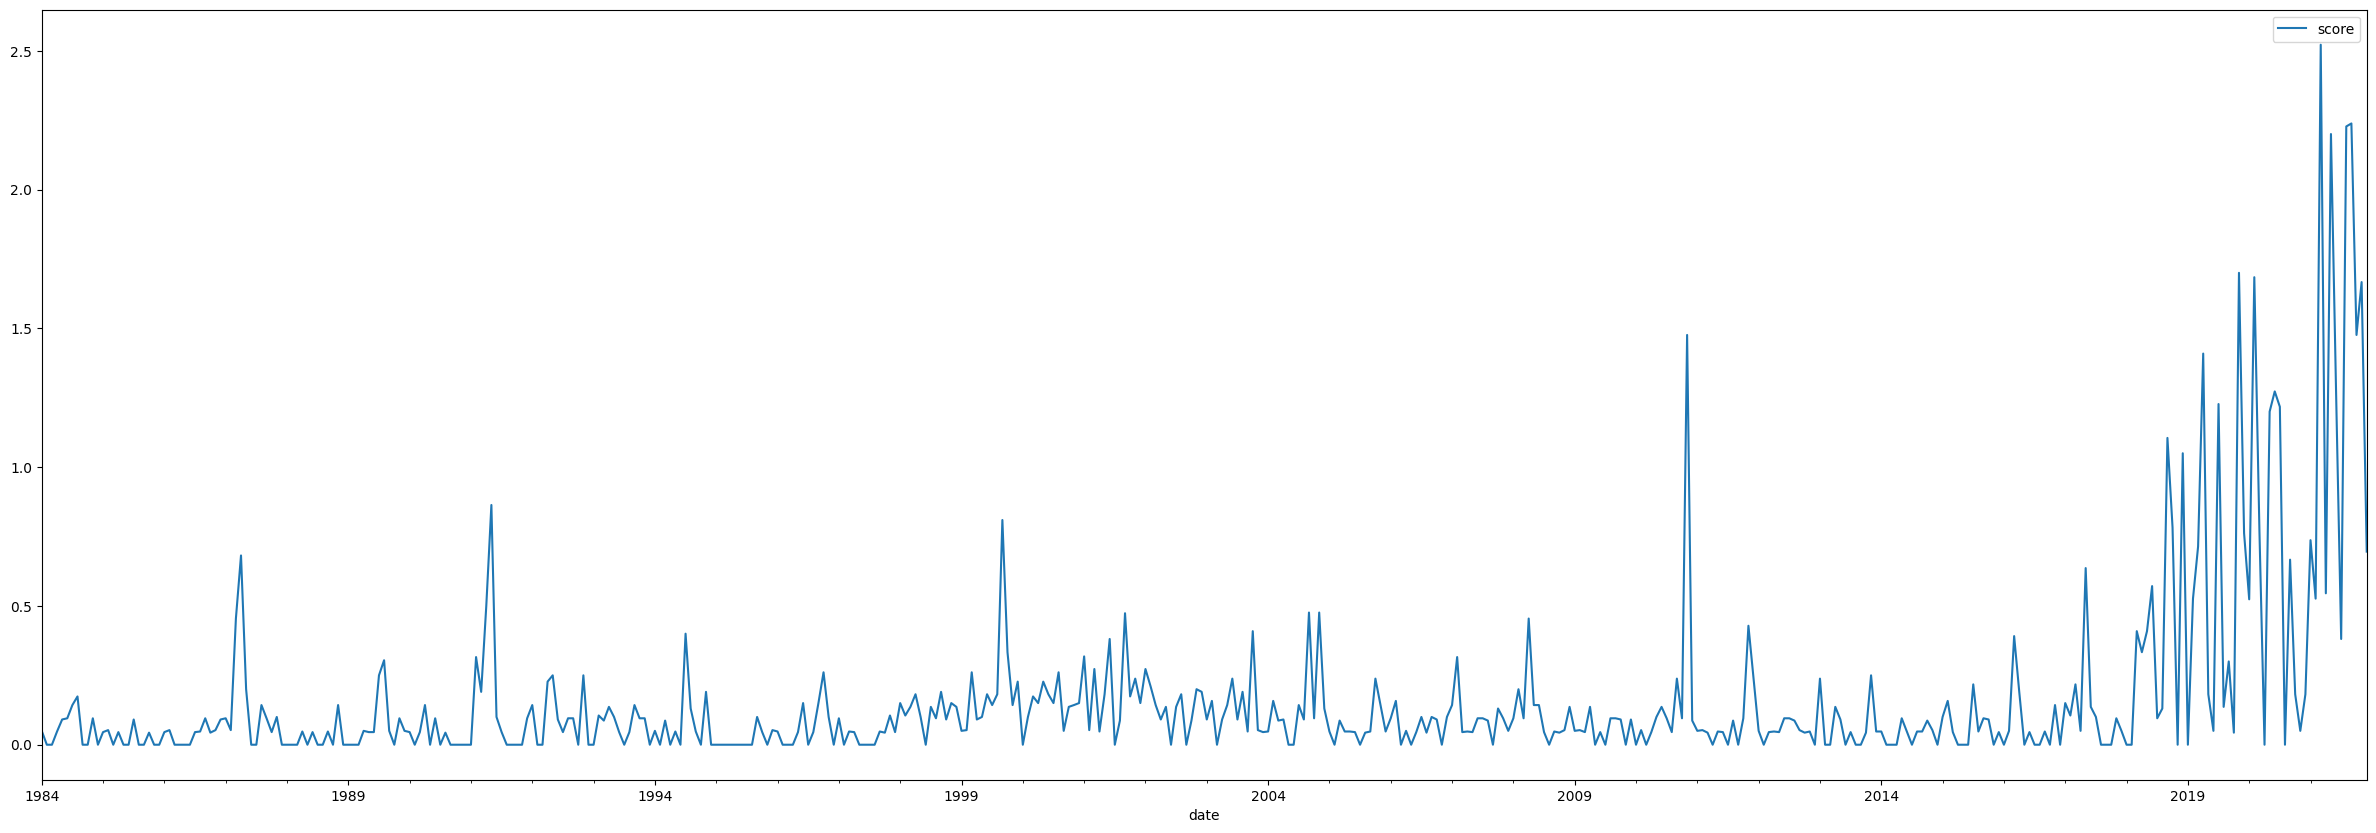

In [45]:
index_m = index.resample('M').mean()
index_m.plot(figsize=(30, 10))